## Исследование зарплат муниципальных служащих города New-York
## Investigation of salaries of municipal employees of the city of New-York

In [34]:
%matplotlib inline

In [35]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv('Civil_List_2014.csv', sep = ',')

df_values = df.values
print (df.columns)
df

Index([u'DPT     ', u'NAME    ', u'ADDRESS ', u'TTL #   ', u'PC      ',
       u'SAL-RATE'],
      dtype='object')


,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00
5,69,M AAKIRI,HRA/DEPARTMENT OF SOCIAL S,56056,A,$33000.00
6,464,A AALAI,CUNY QUEENSBOROUGH COMMUNI,4607,N,$73.53
7,998,A V AALEVIK,N.Y.C. TRANSIT AUTHORITY,402,2,$33280.00
8,998,M AAMIR,N.Y.C. TRANSIT AUTHORITY,00T07,4,$60878.00
9,826,M R AARABI,DEPARTMENT OF ENVIRONMENTA,34202,A,$69272.00


In [43]:
#В этом файле собраны расшифровки TTL, т.е. названия должностей и их title codes. Однако, есть должности,
# к которым нет расшифровки, они остаются в прежнем виде

df_TTL = pd.read_csv('NYC_Civil_Service_Titles.csv', sep = ',')
print (df_TTL.columns)
TTL = pd.Series(list(df_TTL["DESCR"]), index = df_TTL["TITLE"])
TTL.drop_duplicates(inplace = True)

Index([u'TITLE', u'DESCR', u'SFFX', u'SFX DESCR', u'STD HRS', u'ASG LVL',
       u'JOBCODE', u'UNION CD', u'UNION DESCR', u'BARG UNIT', u'BARG DESCR',
       u'MIN RATE', u'MAX RATE'],
      dtype='object')


In [44]:
df_TTL

,TITLE,DESCR,SFFX,SFX DESCR,STD HRS,ASG LVL,JOBCODE,UNION CD,UNION DESCR,BARG UNIT,BARG DESCR,MIN RATE,MAX RATE
0,70467,CAPTAIN (CORRECTION) TED < 11/,0,CAPTAIN (CORRECTION) TED < 11/1/92,40,0,5859,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
1,70467,CAPTAIN (CORRECTION) TED < 11/,1,CAPTAIN (CORRECTION)(ROTATING SHIFT) TED < 11/...,40,0,5860,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
2,70467,CAPTAIN (CORRECTION) TED < 11/,2,CAPTAIN (CORRECTION) 8 1/4 HR DAY TED < 11/1/92,40,0,5861,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
3,70467,CAPTAIN (CORRECTION) TED < 11/,3,CAPTAIN (CORRECTION) - PROMOTED AFTER 10/31/92,40,0,5862,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
4,70467,CAPTAIN (CORRECTION) TED < 11/,4,CAPTAIN (CORRECTION)-ROTATING SHIFTS-PROMOTED ...,40,0,5863,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
5,70467,CAPTAIN (CORRECTION) TED < 11/,5,CAPTAIN (CORRECTION)-8 1/4 HR DAY-PROMOTED AFT...,40,0,5864,25,CORRECTION CAPTAINS ASSOCIATIO,CCA,Correction Captains Assocation,$74491.00,$94300.00
6,70265,CAPTAIN (POLICE SERVICE)(REC N,0,CAPTAIN (POLICE SERVICE)(REC N/S)(< 5YRS),40,0,5777,17,CAPTAINS ENDOWMENT ASSOCIATION,CEA,Captains Endowment Association,$110556.00,$140945.00
7,70265,CAPTAIN (POLICE SERVICE)(REC N,1,CAPTAIN (POLICE SERVICE)(10 HOURS)(NON-RECUR N...,40,0,5778,17,CAPTAINS ENDOWMENT ASSOCIATION,CEA,Captains Endowment Association,$110556.00,$140945.00
8,70265,CAPTAIN (POLICE SERVICE)(REC N,2,CAPTAIN (POLICE SERVICE)(NON-RECUR N/S)(< 5YRS),40,0,5779,17,CAPTAINS ENDOWMENT ASSOCIATION,CEA,Captains Endowment Association,$110556.00,$140945.00
9,70265,CAPTAIN (POLICE SERVICE)(REC N,3,CAPTAIN (POLICE SERVICE)(REC N/S)(=> 5YRS),40,0,5780,17,CAPTAINS ENDOWMENT ASSOCIATION,CEA,Captains Endowment Association,$110556.00,$140945.00


In [45]:
# Где возможно, меняем title code на название должности

title_list = []
for i in range(df_values.shape[0]):
    #print (i)
    df_values[i, 5] = float((df_values[i, 5])[1:])
    if df_values[i, 3] in TTL:
        title_list.append(TTL[df_values[i, 3]])
    else:
        title_list.append("TTL #" + str(df_values[i, 3]))    

df['SAL-RATE'] = df_values[:, 5]
df["TTL #   "] = title_list

In [46]:
df

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,MONITOR,X,5
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,MONITOR,X,5
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,SUPERVISOR I (WELFARE),A,51955
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,COLLEGE AIDE (ALL CITY DEPTS),X,12
4,56,I D AADIL,POLICE DEPARTMENT,POLICE COMMUNICATIONS TECHNICI,A,46953
5,69,M AAKIRI,HRA/DEPARTMENT OF SOCIAL S,COMMUNITY ASSISTANT,A,33000
6,464,A AALAI,CUNY QUEENSBOROUGH COMMUNI,TTL #4607,N,73.53
7,998,A V AALEVIK,N.Y.C. TRANSIT AUTHORITY,TTL #402,2,33280
8,998,M AAMIR,N.Y.C. TRANSIT AUTHORITY,TTL #00T07,4,60878
9,826,M R AARABI,DEPARTMENT OF ENVIRONMENTA,CONSTRUCTION PROJECT MANAGER,A,69272


(array([  0.00000000e+00,   5.00000000e-06,   1.00000000e-05,
          1.50000000e-05,   2.00000000e-05,   2.50000000e-05]),
 <a list of 6 Text yticklabel objects>)

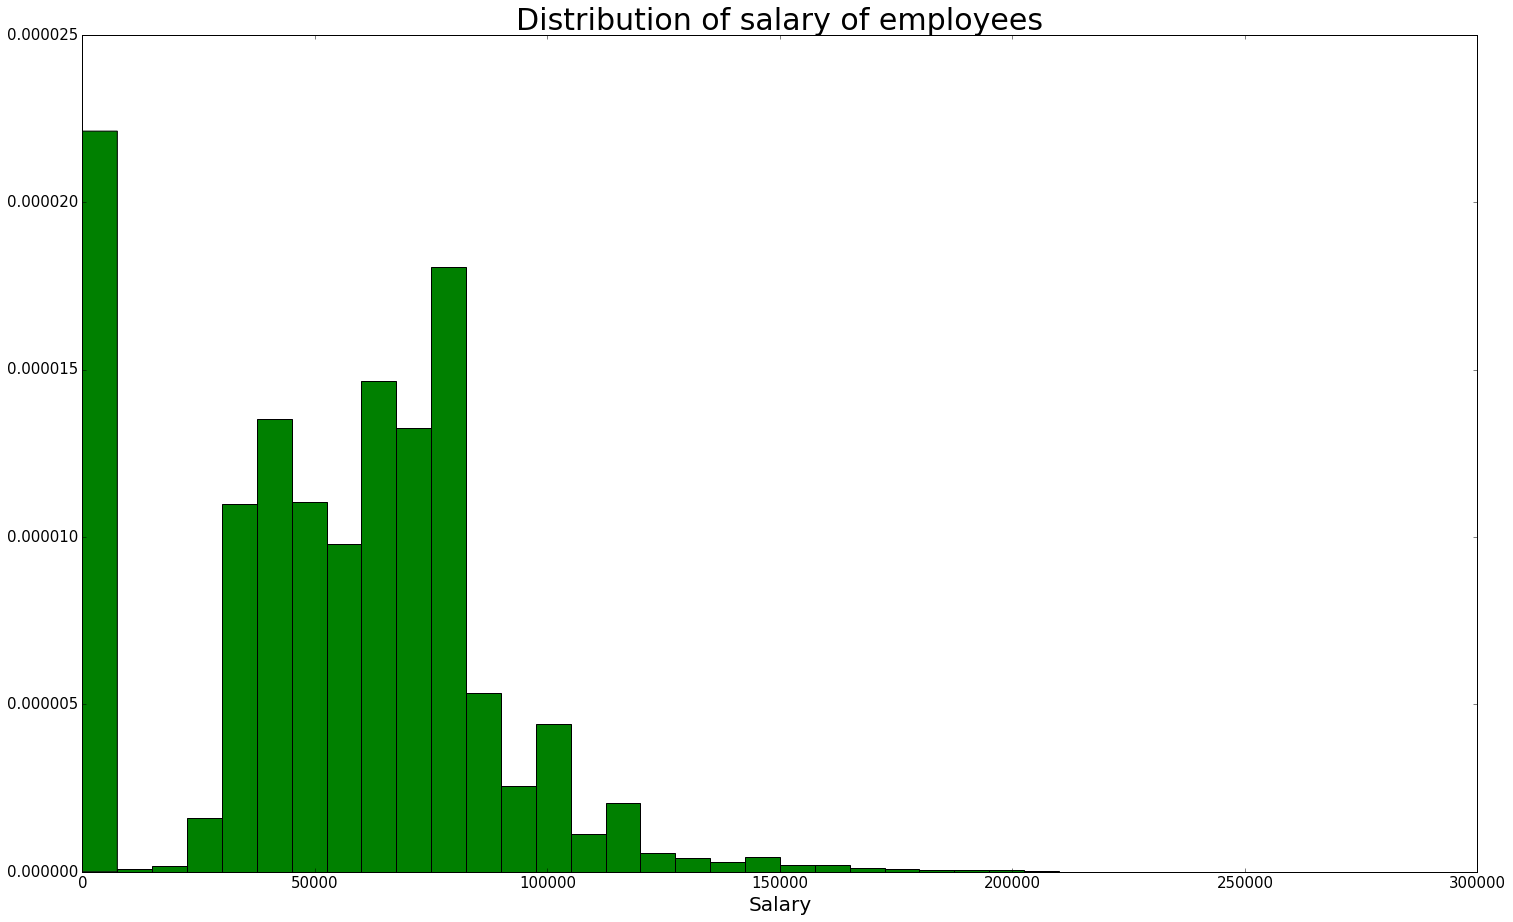

In [47]:
plt.figure(figsize = (25, 15))
plt.hist(df_values[:, 5], 40, color = 'g', normed = True)

plt.title(u"Distribution of salary of employees", fontsize = 30)
plt.xlabel(u'Salary', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [53]:
df["SAL-RATE"] = df["SAL-RATE"].astype(float)
pos_disp = ((df["SAL-RATE"]).groupby(df["TTL #   "])).var()
pos_size = (df["SAL-RATE"].groupby(df["TTL #   "])).size()

pos_disp.sort_values(ascending=False, inplace = True)

print ("ТОП-10 должностей с наибольшей дисперсией по зарплатам:")
print ()

i = 0
top = 1
while top < 11:
    if pos_size[pos_disp.index[i]] > 20 :
        print ((top), ") ", pos_disp.index[i], ", var = ", pos_disp[i], sep = '')
        top = top + 1
    i = i + 1

ТОП-10 должностей с наибольшей дисперсией по зарплатам:

1) COMMISSIONER, var = 4522438835.13
2) COUNCIL MEMBER, var = 1937146683.83
3) Special Assistant (MA)-MGRL, var = 1433123088.91
4) TTL #280, var = 1359866997.54
5) TTL #30114, var = 1327599772.15
6) EDUCATIONAL MANAGEMENT ASSOCIA, var = 1198793088.07
7) TTL #158, var = 1151922116.27
8) TTL #108, var = 1149301039.83
9) PSYCHOLOGIST, var = 1082753305.13
10) TTL #201, var = 1059208062.83


In [58]:
df["SAL-RATE"] = df["SAL-RATE"].astype(float)
deport_median = ((df["SAL-RATE"]).groupby(df["ADDRESS "])).median()
deport_size = (df["SAL-RATE"].groupby(df["ADDRESS "])).size()

deport_median_sort.sort_values(ascending=False, inplace = True)

print ("ТОП-10 департаментов с наибольшей медианной зарплатой:")
print ()

for i in range(10):
    print ((i+1), ") ", deport_median_sort.index[i], ", salary = ", deport_median_sort[i], sep = '')
    
print()
print ("ТОП-10 департаментов с наименьшей медианной зарплатой:")
print ()

i = 1
while i < 11:
    print ((i), ") ", deport_median_sort.index[i * (-1)], ", salary = ", deport_median_sort[i * (-1)], sep = '')
    i = i + 1


ТОП-10 департаментов с наибольшей медианной зарплатой:

1) FINANCIAL INFORMATION SERV, salary = 100638.5
2) COMMUNITY BOARD NO.1 BRONX, salary = 95086.5
3) COMMUNITY BOARD NO.3-BRONX, salary = 95010.0
4) COMMUNITY BOARD NO.6-BRONX, salary = 92278.0
5) OFFICE OF COLLECTIVE BARGA, salary = 86412.5
6) COMMUNITY BOARD NO.5-BRONX, salary = 85111.0
7) CONFLICTS OF INTEREST BOAR, salary = 82087.0
8) COMMUNITY BOARD NO.9-BROOK, salary = 80983.0
9) INDEPENDENT BUDGET OFFICE, salary = 80000.0
10) TAX COMMISSION, salary = 79039.0

ТОП-10 департаментов с наименьшей медианной зарплатой:

1) DEPARTMENT OF CITYWIDE ADM, salary = 5.0
2) CUNY MEDGAR EVERS COLLEGE, salary = 6.51
3) DEPARTMENT FOR THE AGING, salary = 8.75
4) BOARD OF ELECTIONS, salary = 17.92
5) CUNY COLLEGE OF STATEN ISL, salary = 18.0
6) COMMUNITY BOARD NO.2-RICHM, salary = 25.81
7) COMMUNITY BOARD NO.11-BRON, salary = 34.52
8) COMMUNITY BOARD NO.10-BRON, salary = 37.06
9) CUNY KINGSBOROUGH COMMMUNI, salary = 38.91
10) OFFICE OF ADMINI

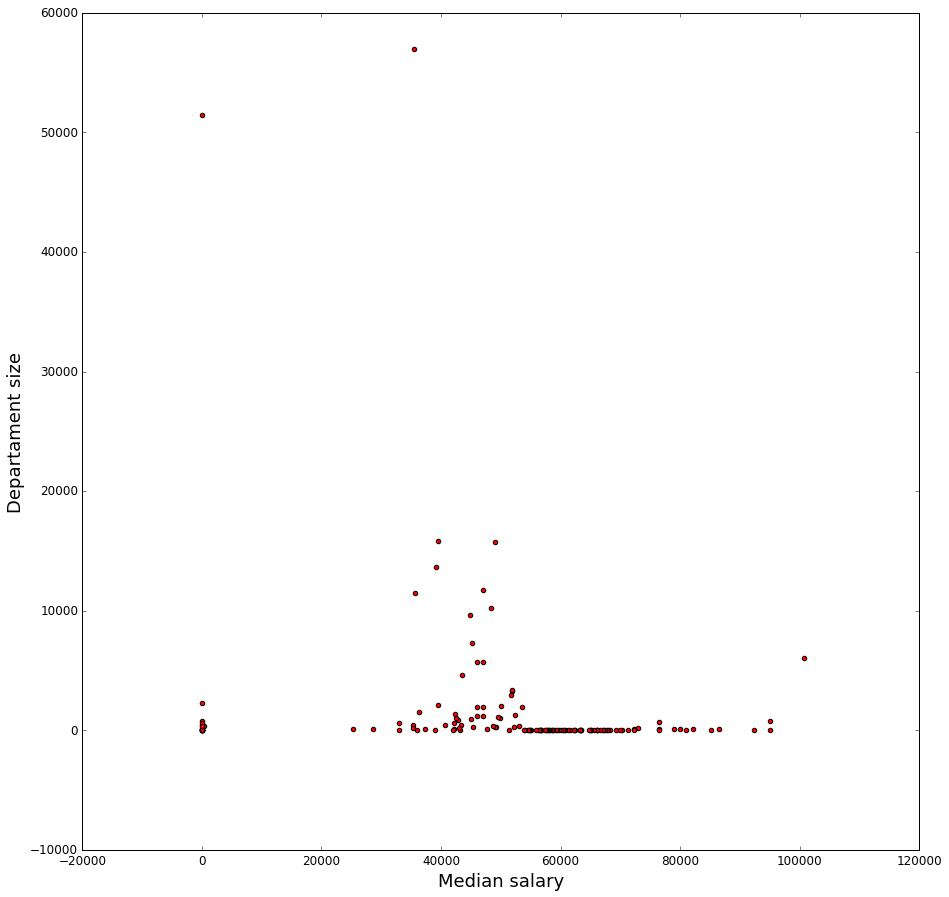

In [73]:
plt.figure(figsize = (15, 15))
plt.xticks(fontsize = 12)
plt.xlabel(u'Median salary', fontsize = 18)
plt.ylabel(u'Departament size', fontsize = 18)
plt.yticks(fontsize = 12)
plt.scatter(deport_median.values, deport_size.values, c = 'r')

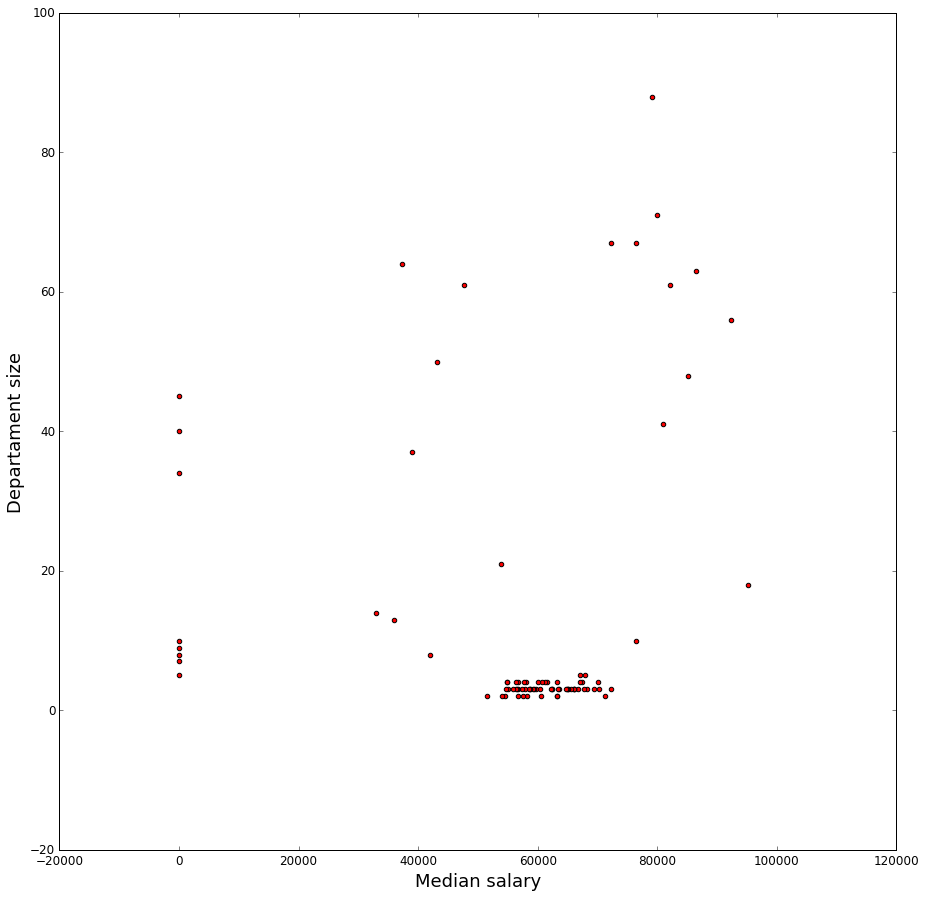

In [75]:
#немного поподробней кучку внизу:

plt.figure(figsize = (15, 15))
plt.xticks(fontsize = 12)
plt.xlabel(u'Median salary', fontsize = 18)
plt.ylabel(u'Departament size', fontsize = 18)
plt.yticks(fontsize = 12)
plt.ylim([-20, 100])
plt.scatter(deport_median.values, deport_size.values, c = 'r')